### Introduction

-

### Industry Scope

The streaming industry has witnessed exponential growth over the last decade, disrupting the traditional media landscape. This shift has empowered viewers with greater flexibility and choice, and has encouraged other entertainment companies to enter the streaming market. As a result, platforms like Hulu, Amazon Prime Video, and Disney+ are constantly competing for viewer attention. Netflix’s unique advantage lies in its vast content catalog, which spans various genres, languages, and countries, and its investment in original productions, which have garnered critical acclaim and a loyal following.

### Purpose of the Analysis

-

### Dataset Overview

-

| Column      | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| `Age`   | Edad del miembro del gimnasio                                           |
| `Gender`      | Genero del miembro del gimnasio (Hombre o Mujer)|
| `Weight(KG)`     | Peso del miembro del gimnasio                                                     |
| `Height(mt)`  | Altura del miembro del gimnasio                                      |
| `Max_BPM`      | Máximo de latidos del corazón, latidos por minuto durante las sesión de ejercicio                                                  |
| `Avg_BPM`   | Promedio de latidos durante la sesión de ejercicios                                   |
| `Resting_BPM`| Latidos antes de la sesion de ejercicio|
| `Session_Duration (hours)` | Durancion de dla sesion de ejercicios por hora                                            |
| `Calories_Burned`    | Calorias quemadas durante cada sesion|
| `Workout_Type`  | Tipo de ejercicio realizado (Cardio, Fuerza, Yoga, HIIT)           |
| `Fat_Percentage` | Porcentaje de grasa del miembro del gimnasio                                          |
| `Water_Intake (liters)` | Cantidad de agua en litros tomadas en la sesion de entremiento|
| `Workout_Frequency (days/week)` | Numero de sesiones de ejercicios por semana.                                              |
| `Experience_Level` | Nivel de experiencia realizando ejercicios principiante(1) a experto(3)                                              |
| `BMI` | Indice de masa corporal, calculado desde la altura y peso del miembro del gimnasio|


-

# 1. Imports and Setup

In [11]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 2. Data Loading

In [12]:
df = pd.read_csv('gym_members_exercise_tracking.csv', sep=",")

# Resumen estadístico
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Descripción estadística básica del dataset
print("\nDescripción estadística:")
print(df.describe())

info = df.shape
print("\nLa cantidad de filas y columnas en nuestro dataframe es de:",info)

tipos = df.dtypes
print("\nTipos de datos presentes en el dataset:\n",tipos)

Primeras filas del dataset:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experie

# 3. Exploratory Data Analysis (EDA)

**3.1 Basic Dataset Information**

Análisis de la Variable 'Age'
Media: 38.68
Mediana: 40.00
Desviación Estándar: 12.17
Valor Mínimo: 18.00
Valor Máximo: 59.00




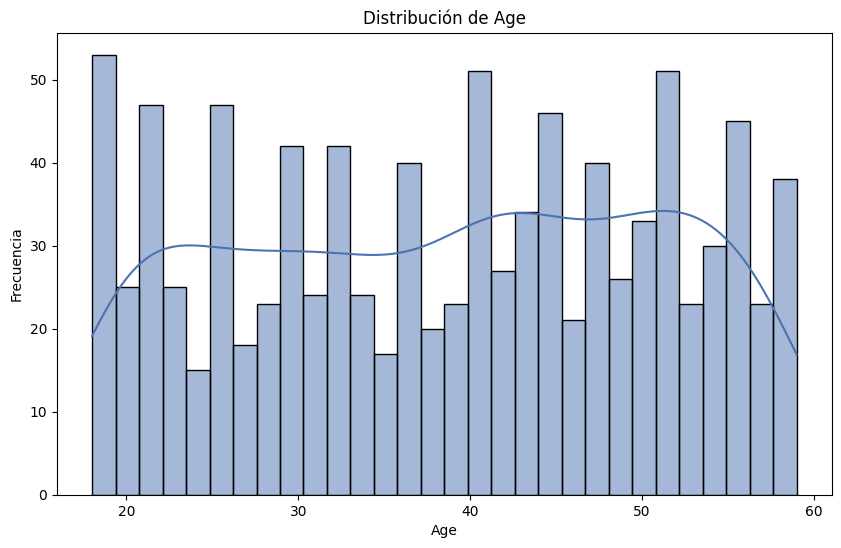

Análisis de la Variable 'Weight (kg)'
Media: 73.85
Mediana: 70.00
Desviación Estándar: 21.20
Valor Mínimo: 40.00
Valor Máximo: 129.90




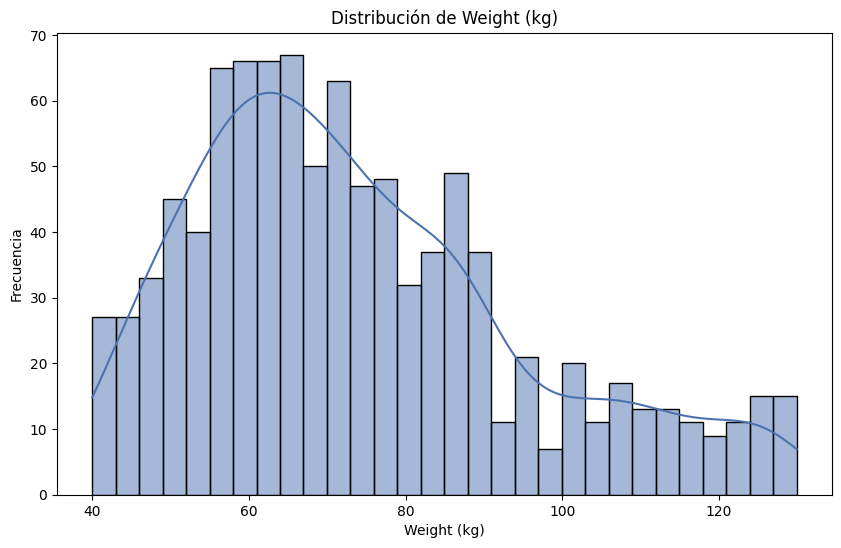

Análisis de la Variable 'Height (m)'
Media: 1.72
Mediana: 1.71
Desviación Estándar: 0.13
Valor Mínimo: 1.50
Valor Máximo: 2.00




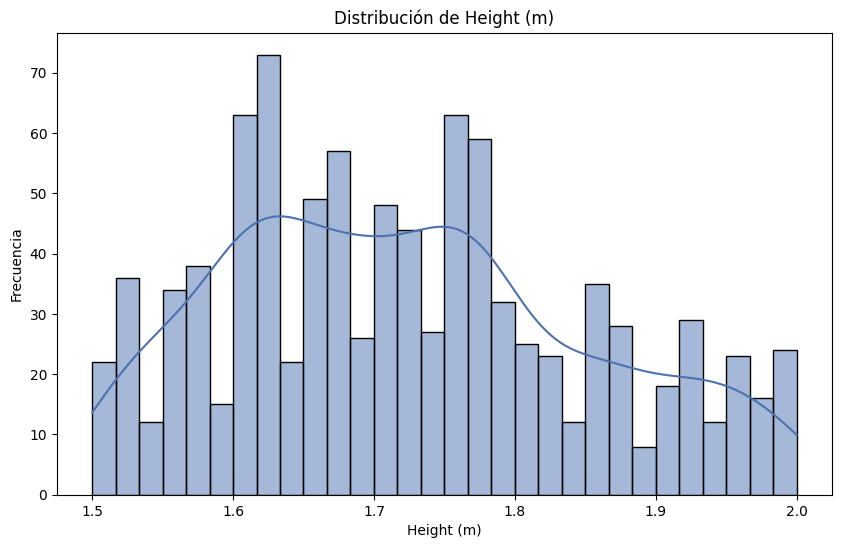

Análisis de la Variable 'Max_BPM'
Media: 179.88
Mediana: 180.00
Desviación Estándar: 11.52
Valor Mínimo: 160.00
Valor Máximo: 199.00




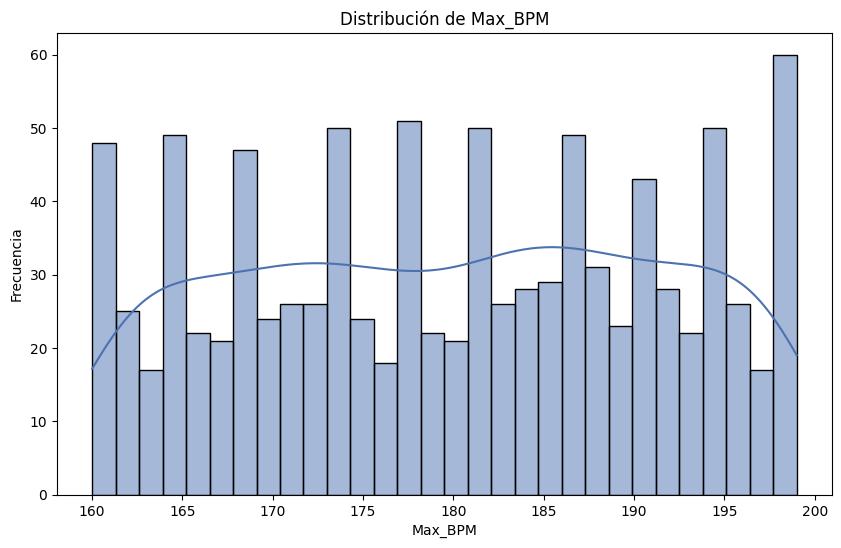

Análisis de la Variable 'Avg_BPM'
Media: 143.77
Mediana: 143.00
Desviación Estándar: 14.34
Valor Mínimo: 120.00
Valor Máximo: 169.00




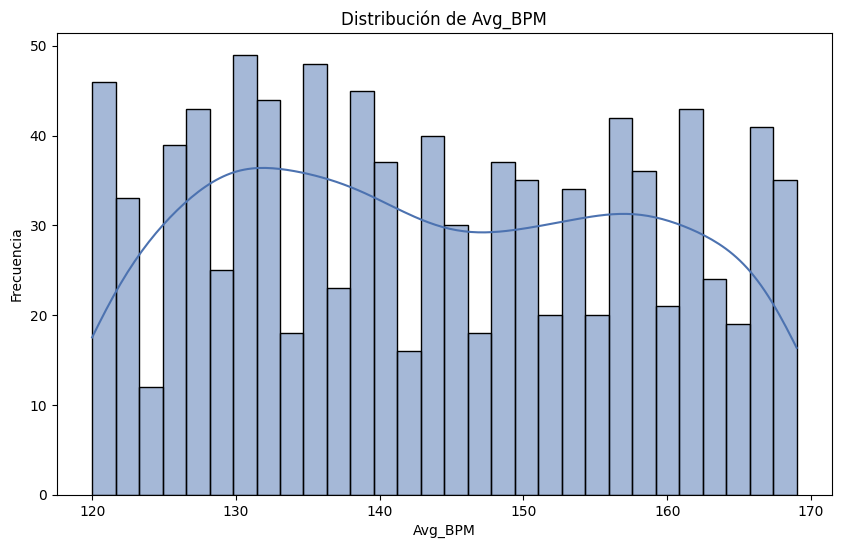

Análisis de la Variable 'Resting_BPM'
Media: 62.22
Mediana: 62.00
Desviación Estándar: 7.32
Valor Mínimo: 50.00
Valor Máximo: 74.00




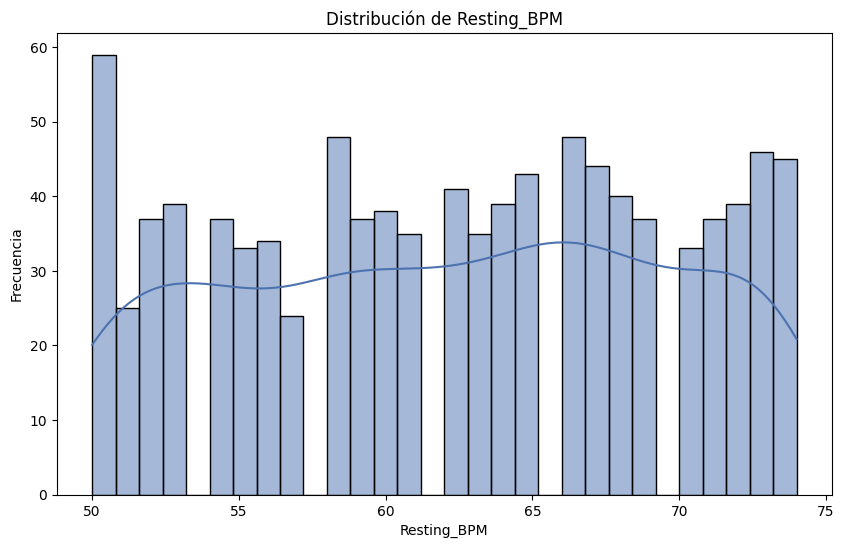

Análisis de la Variable 'Session_Duration (hours)'
Media: 1.26
Mediana: 1.26
Desviación Estándar: 0.34
Valor Mínimo: 0.50
Valor Máximo: 2.00




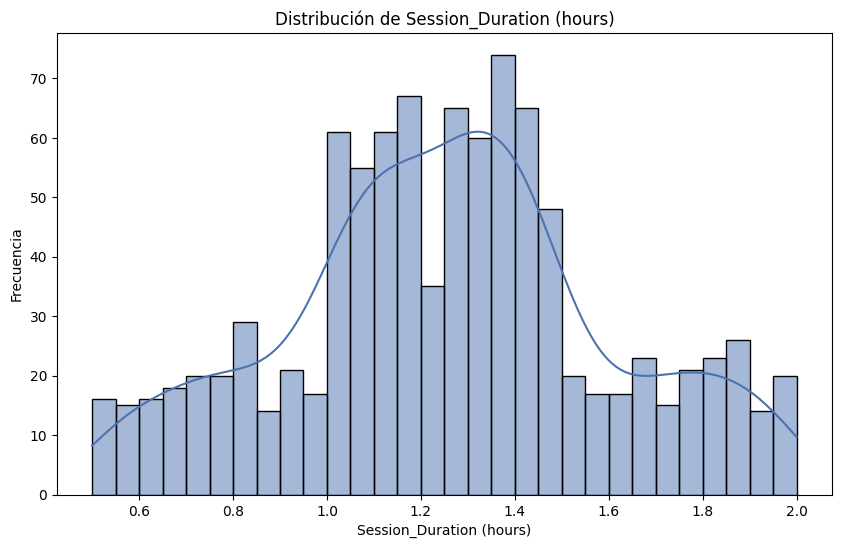

Análisis de la Variable 'Calories_Burned'
Media: 905.42
Mediana: 893.00
Desviación Estándar: 272.50
Valor Mínimo: 303.00
Valor Máximo: 1783.00




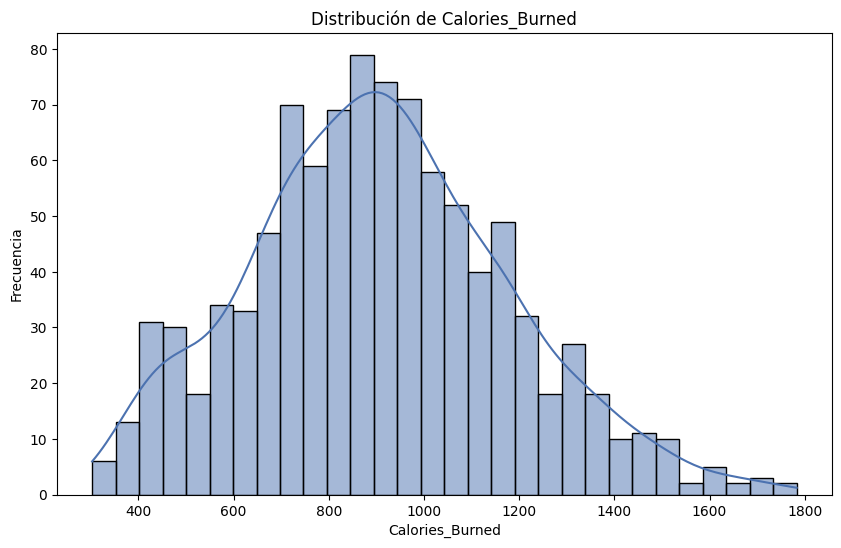

Análisis de la Variable 'Fat_Percentage'
Media: 24.98
Mediana: 26.20
Desviación Estándar: 6.26
Valor Mínimo: 10.00
Valor Máximo: 35.00




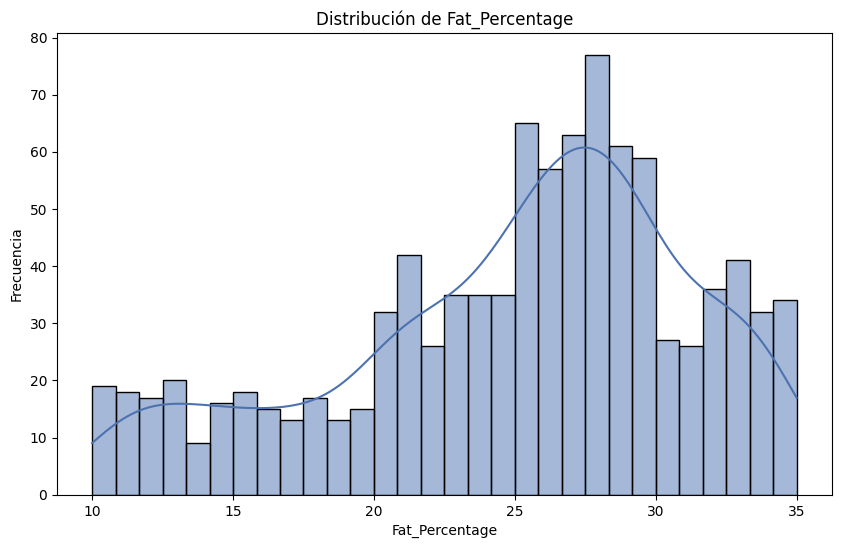

Análisis de la Variable 'Water_Intake (liters)'
Media: 2.63
Mediana: 2.60
Desviación Estándar: 0.60
Valor Mínimo: 1.50
Valor Máximo: 3.70




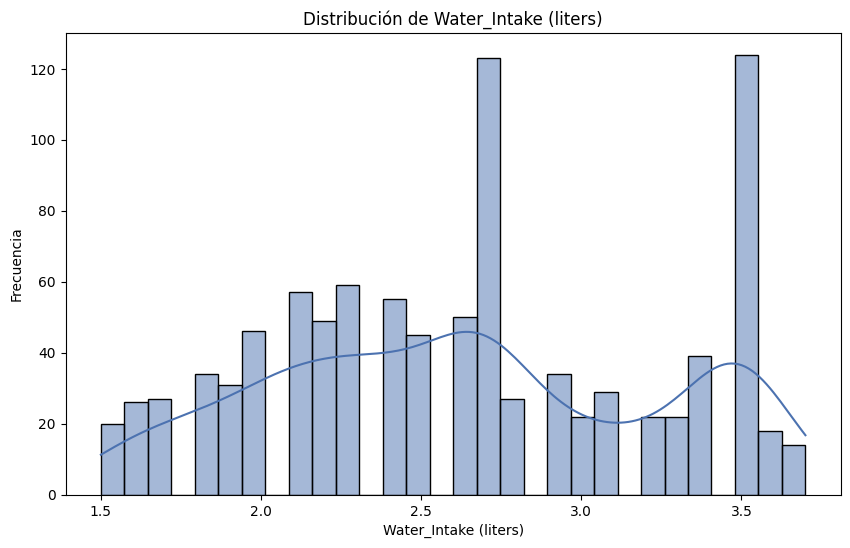

Análisis de la Variable 'Workout_Frequency (days/week)'
Media: 3.32
Mediana: 3.00
Desviación Estándar: 0.91
Valor Mínimo: 2.00
Valor Máximo: 5.00




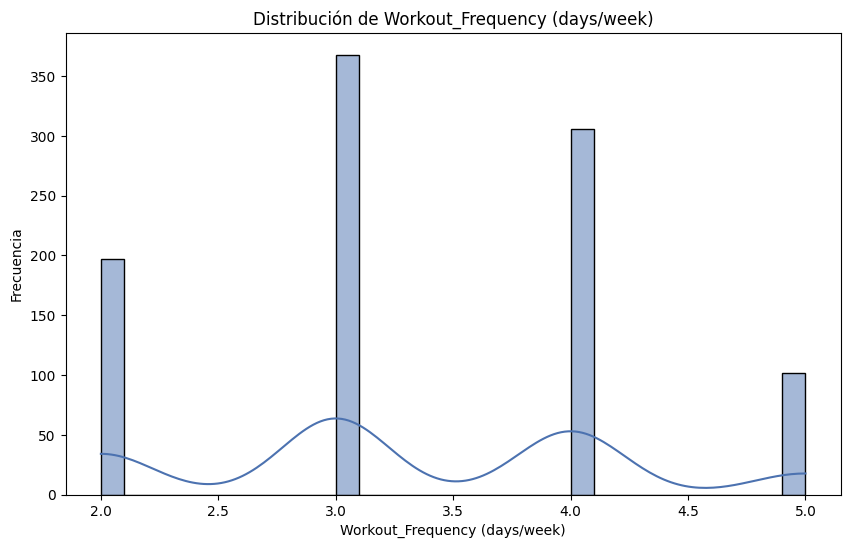

Análisis de la Variable 'Experience_Level'
Media: 1.81
Mediana: 2.00
Desviación Estándar: 0.74
Valor Mínimo: 1.00
Valor Máximo: 3.00




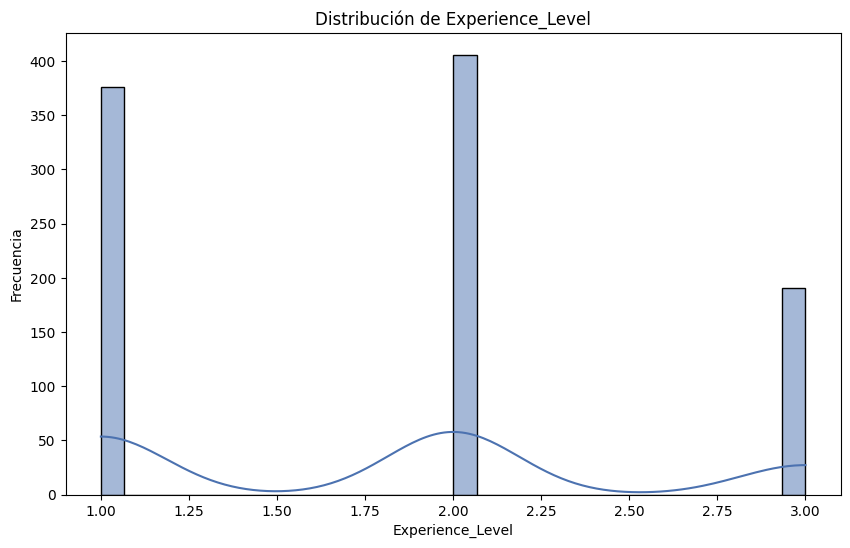

Análisis de la Variable 'BMI'
Media: 24.91
Mediana: 24.16
Desviación Estándar: 6.66
Valor Mínimo: 12.32
Valor Máximo: 49.84




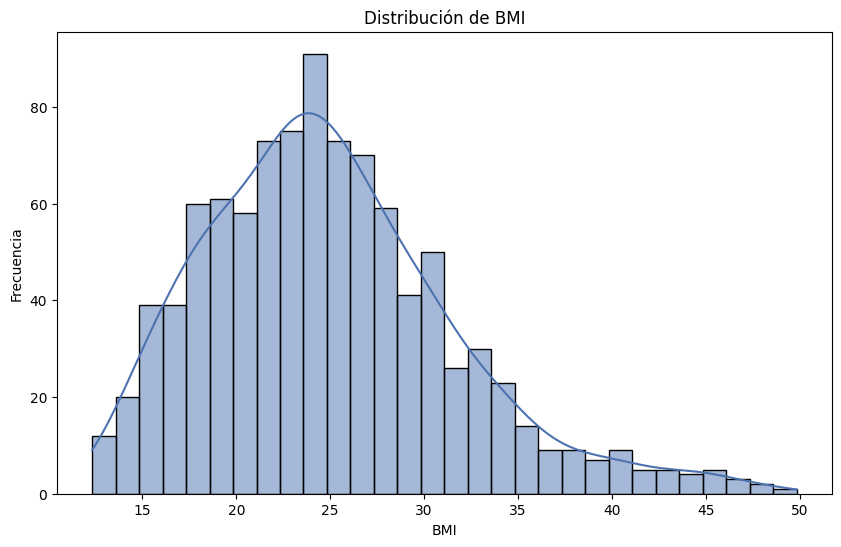

In [13]:
# Función para el análisis univariado de variables cuantitativas
def analizar_variable_cuantitativa(df, columna):
    mean = np.mean(df[columna])
    median = np.median(df[columna])
    std = np.std(df[columna])
    min_value = np.min(df[columna])
    max_value = np.max(df[columna])

    print(f"Análisis de la Variable '{columna}'")
    print(f"Media: {mean:.2f}")
    print(f"Mediana: {median:.2f}")
    print(f"Desviación Estándar: {std:.2f}")
    print(f"Valor Mínimo: {min_value:.2f}")
    print(f"Valor Máximo: {max_value:.2f}")
    print("\n")

    # Visualización de la distribución (Histograma con KDE)
    plt.figure(figsize=(10, 6))
    sns.histplot(df[columna], bins=30, kde=True, color='#4C72B0')
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

# Aplicar la función a todas las columnas numéricas del dataframe
columnas_cuantitativas = df.select_dtypes(include=['int64', 'float64']).columns
for columna in columnas_cuantitativas:
    analizar_variable_cuantitativa(df, columna)

Análisis Univariado de la Variable 'Gender'
Frecuencia de las categorías:
Gender
Male      511
Female    462
Name: count, dtype: int64
Moda (Categoría más frecuente): Male




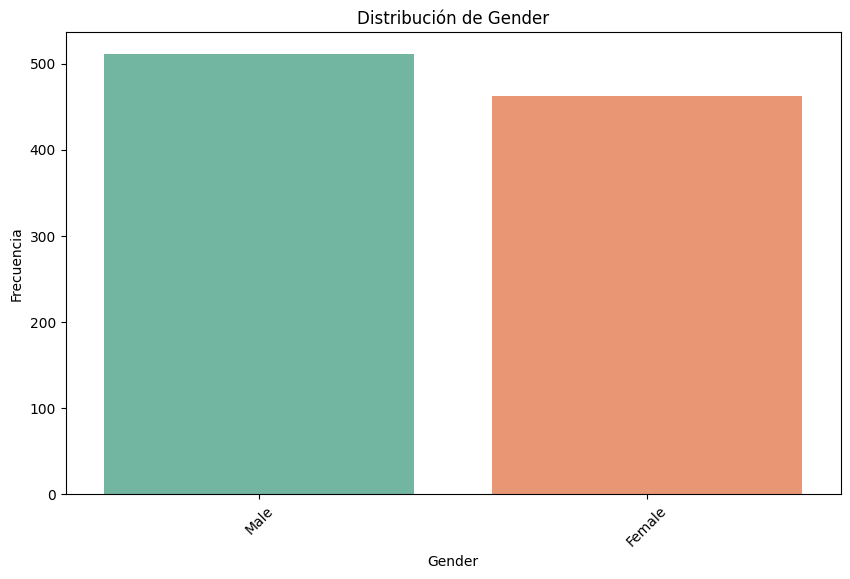

Análisis Univariado de la Variable 'Workout_Type'
Frecuencia de las categorías:
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64
Moda (Categoría más frecuente): Strength




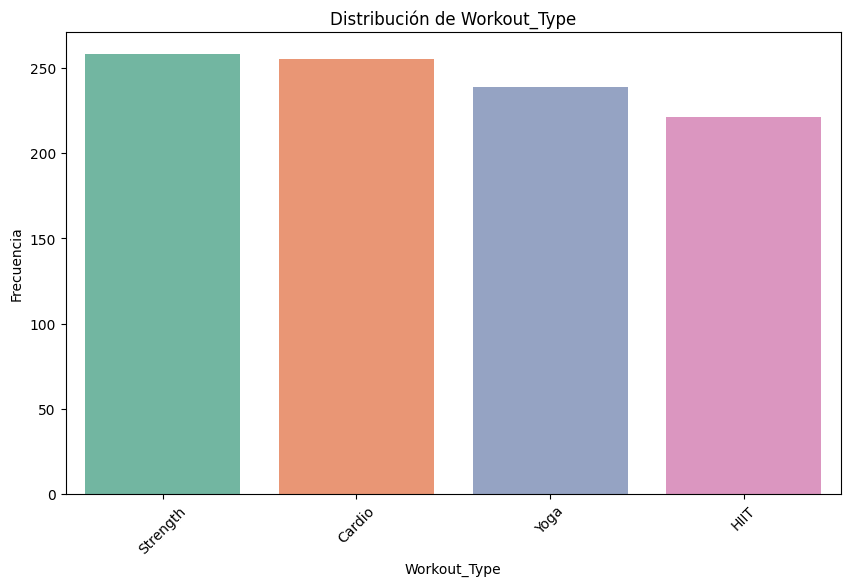

In [14]:
# Función para el análisis univariado de variables categóricas
def analizar_variable_categorica(df, columna):
    values_counts = df[columna].value_counts()
    moda = values_counts.idxmax()

    print(f"Análisis Univariado de la Variable '{columna}'")
    print(f"Frecuencia de las categorías:\n{values_counts}")
    print(f"Moda (Categoría más frecuente): {moda}")
    print("\n")

    # Visualización de la distribución
    plt.figure(figsize=(10, 6))
    sns.countplot(
        x=columna, 
        data=df[df[columna].isin(values_counts.index)], 
        order=values_counts.index, 
        palette='Set2'
    )
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

# Columnas categóricas a excluir
columnas_a_excluir = ['TransactionDate']

columnas_categoricas = [col for col in df.select_dtypes(include=['object']).columns if col not in columnas_a_excluir]

for columna in columnas_categoricas:
    analizar_variable_categorica(df, columna)

**3.2 Check for Missing Values**

In [15]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


**3.3 Duplicate Rows**

In [16]:
# Count and remove duplicate rows
df.duplicated().sum()

0

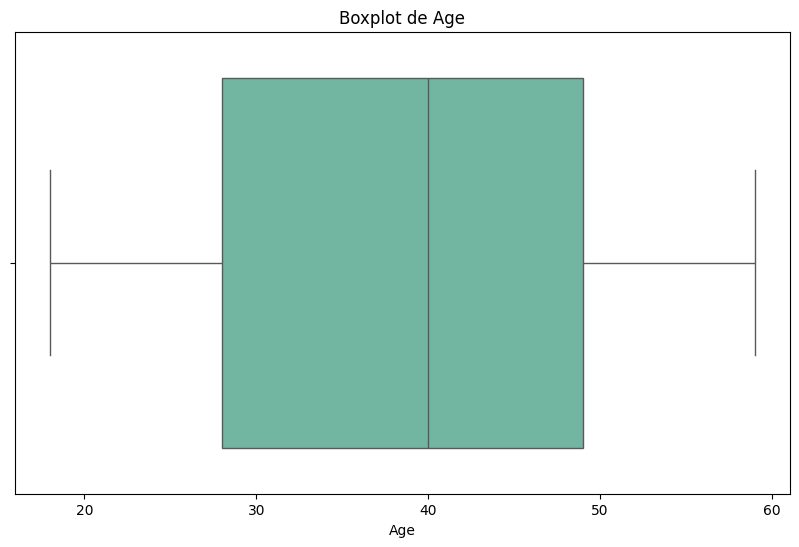

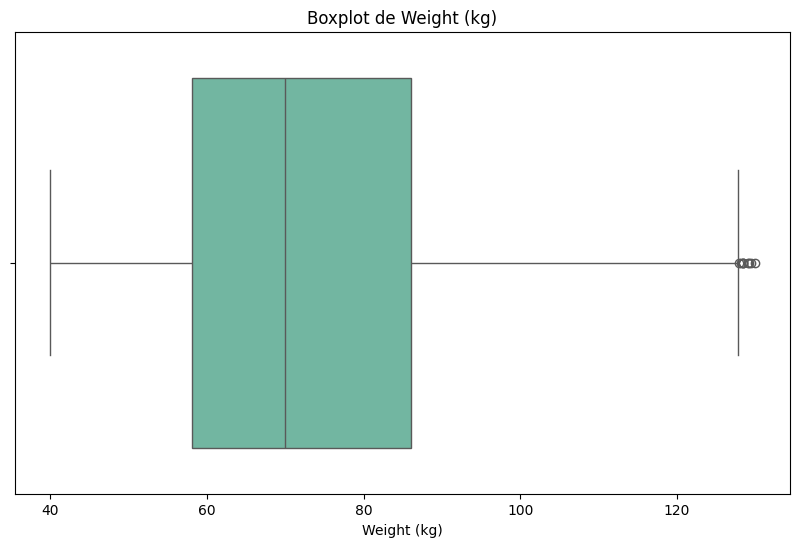

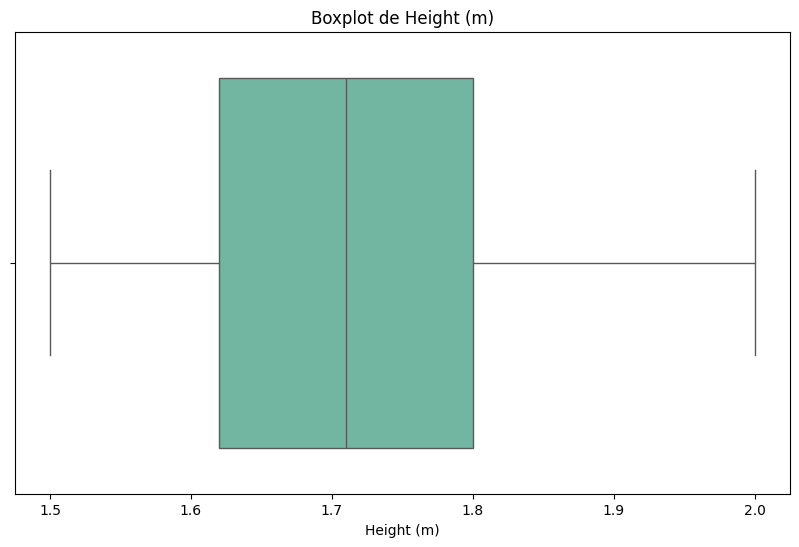

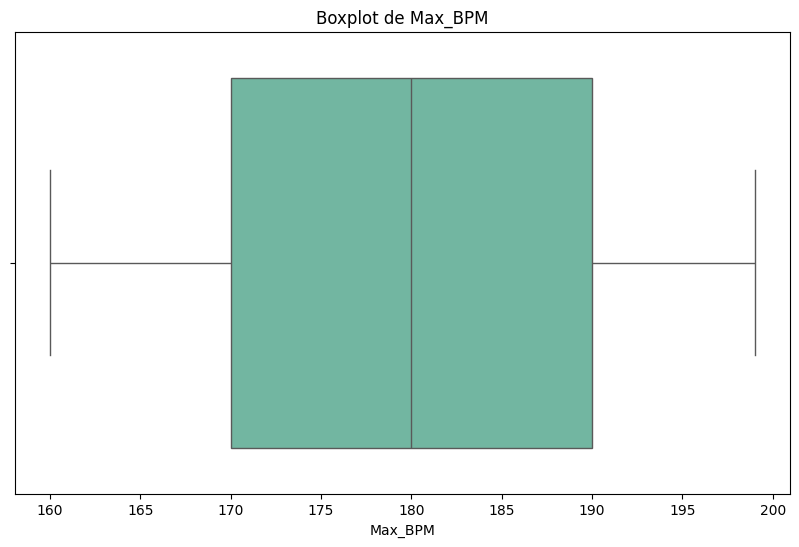

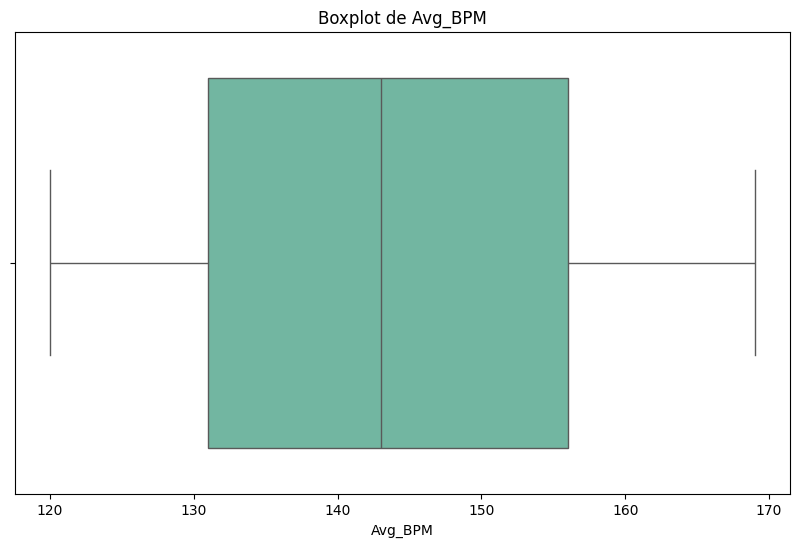

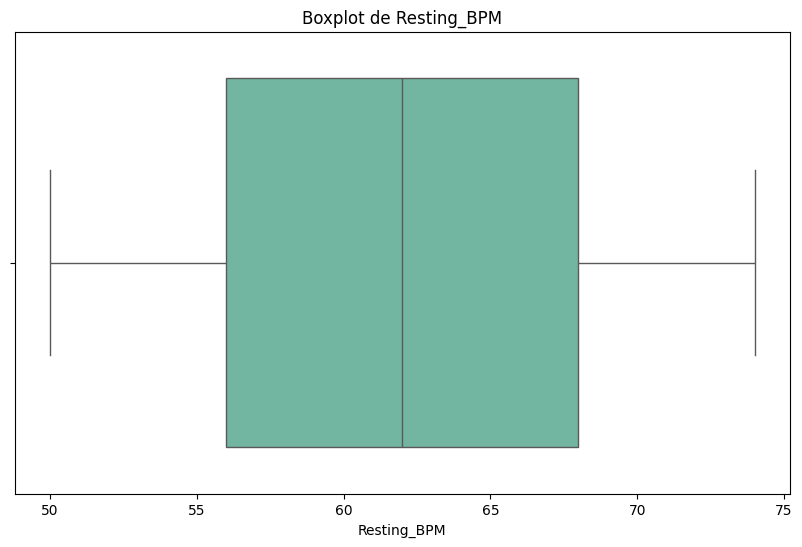

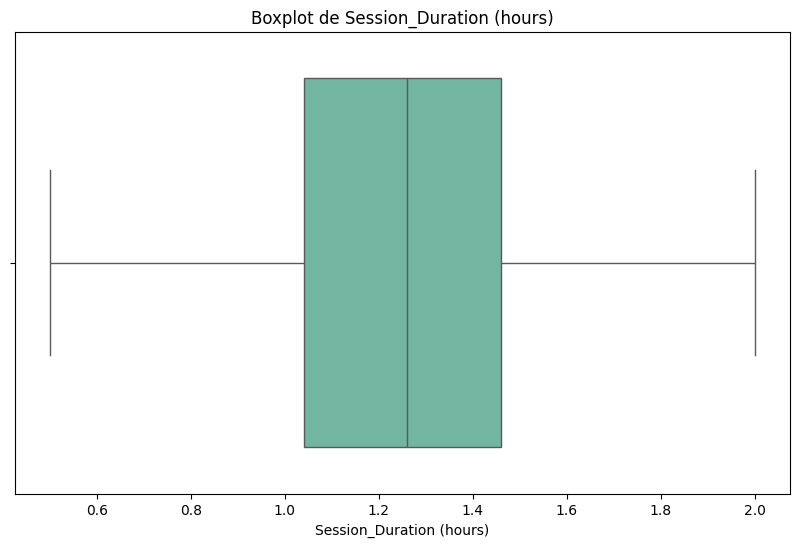

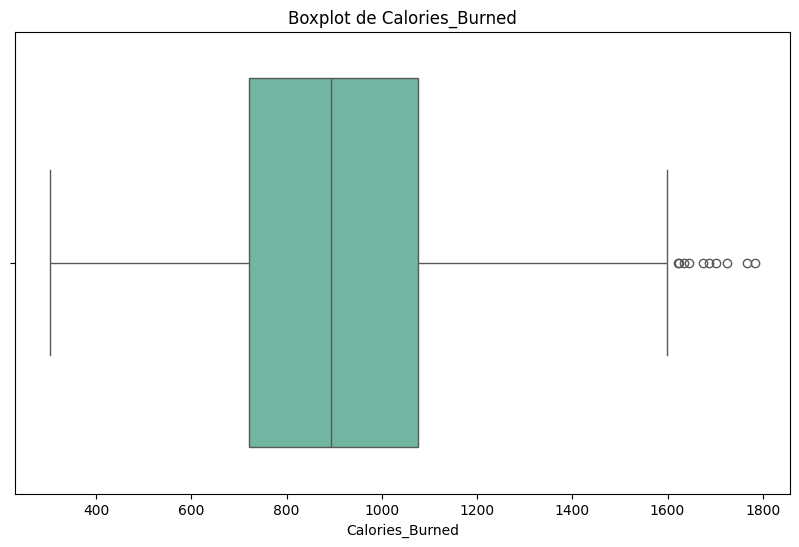

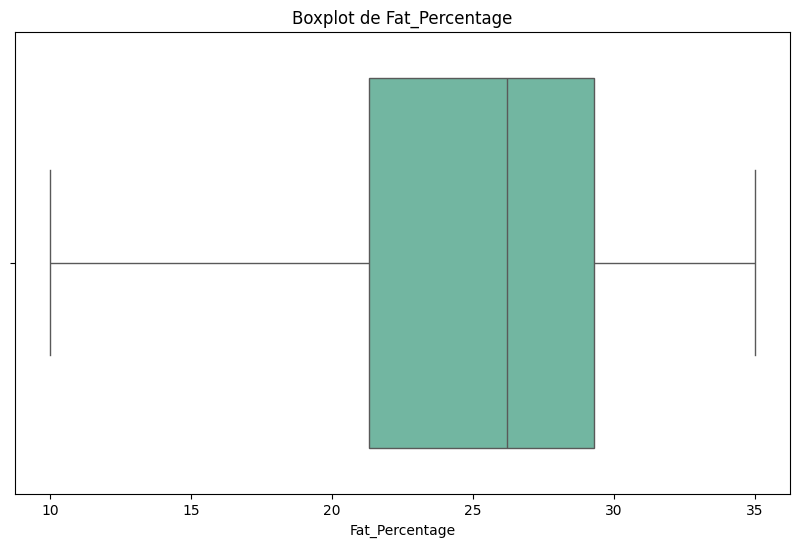

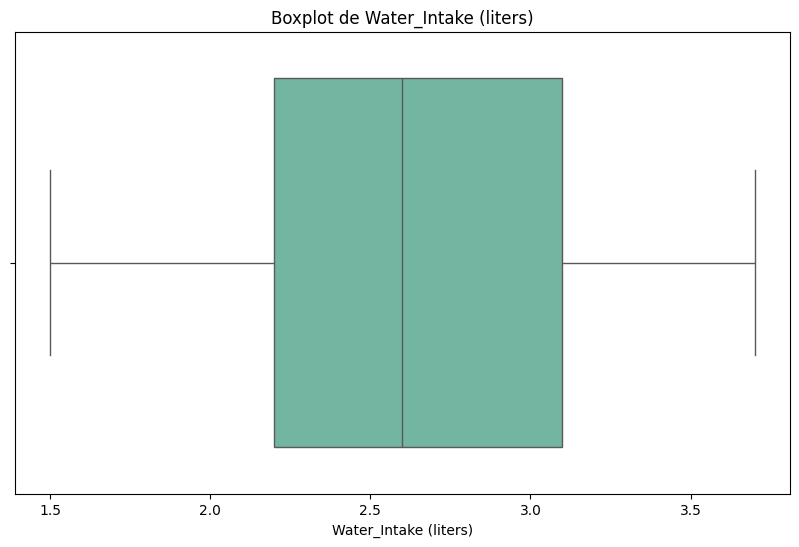

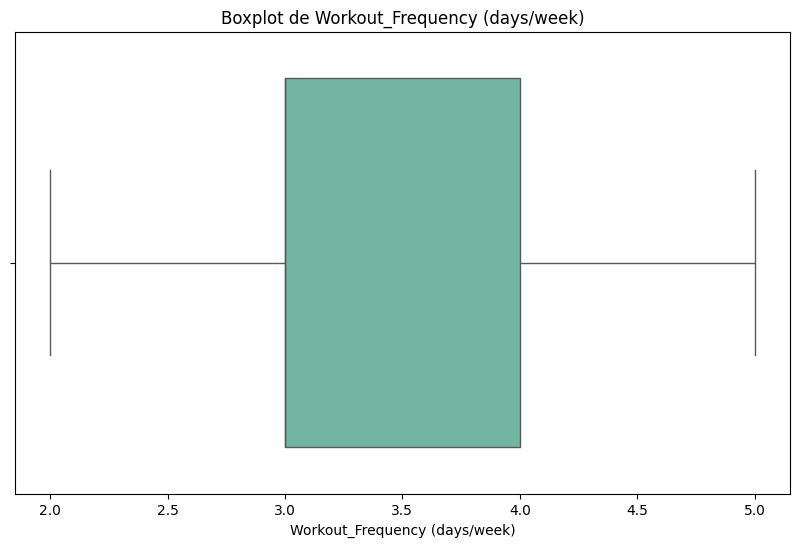

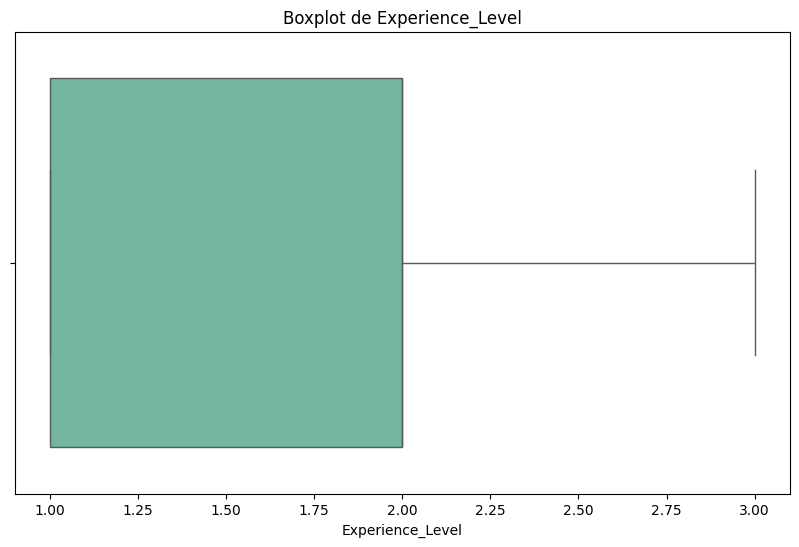

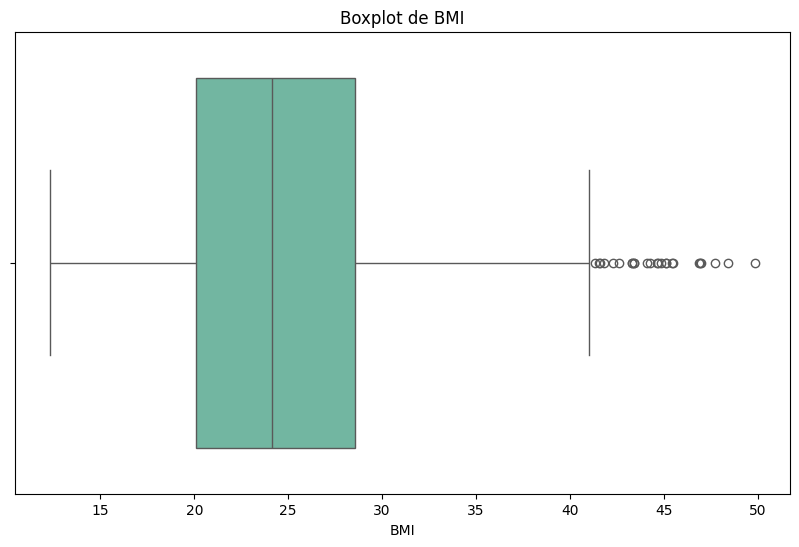

In [17]:
def generar_boxplot(df, columna):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=columna, palette='Set2')
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)
    plt.show()

# Aplicar la función a todas las columnas numéricas del dataframe
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
for columna in columnas_numericas:
    generar_boxplot(df, columna)

- Durante la verificación de valores atípicos que se encuentran en ciertas variables podemos confirmar que existen si bien pueden ser datos que no son errores de tipeo o también pueden ser casos reales de información, lo más probable es que estos datos se tengan que tratar para la aplicación de modelos de machine learning al dataset, pero por ahora solo vamos a realizar un análisis de estos datos para verificar tendencias o patrones que nos puedan dar datos de valor.

# 4. Insights and Queries

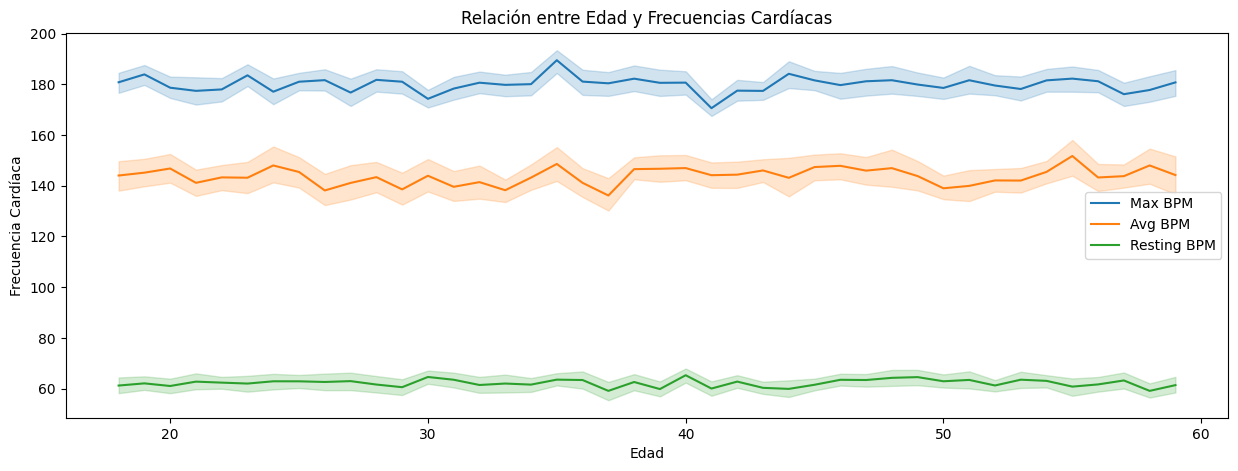

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.lineplot(x='Age', y='Max_BPM', data=df, label='Max BPM')
sns.lineplot(x='Age', y='Avg_BPM', data=df, label='Avg BPM')
sns.lineplot(x='Age', y='Resting_BPM', data=df, label='Resting BPM')
plt.title("Relación entre Edad y Frecuencias Cardíacas")
plt.xlabel("Edad")
plt.ylabel("Frecuencia Cardíaca")
plt.legend()
plt.show()


- Con este gráfico podemos verificar la relación en entre la edad y la frecuencia cardiaca máxima, en promedio y las nomarles (sin actividad física), como podemos ver no hay muchas varianzas entre las frecuencias cardiacas dependiendo de la edad.

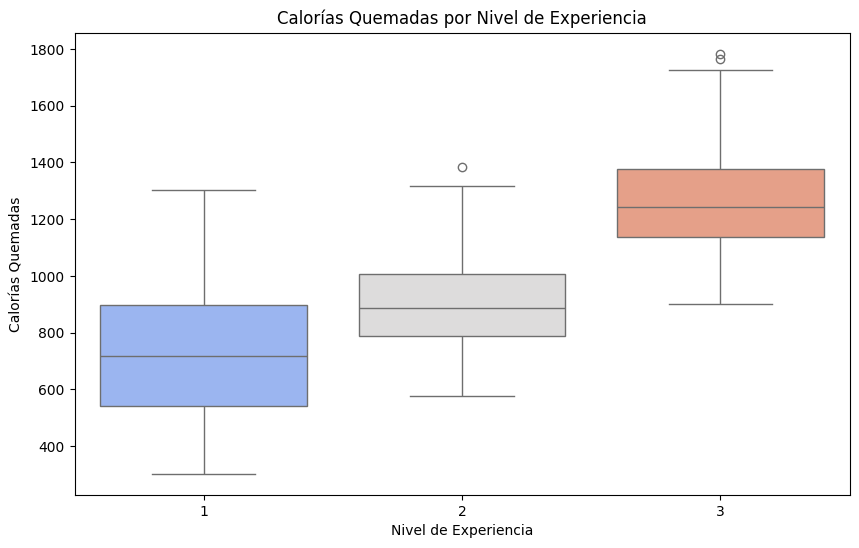

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience_Level', y='Calories_Burned', data=df, palette='coolwarm')
plt.title("Calorías Quemadas por Nivel de Experiencia")
plt.xlabel("Nivel de Experiencia")
plt.ylabel("Calorías Quemadas")
plt.show()


- En estos gráficos podemos ver las calorías quemadas por el nivel de experiencia de cada usuario, según los boxplot podemos deducir que a través de la experiencia las calorías quemadas van aumentando, esto puede ser debido a la mejora de la técnica de los ejercicios o el descubrimiento o aplicación de ejercicio más complicados lo que hacen reducir mayor cantidad de calorías durante la sesión de ejercicios,

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

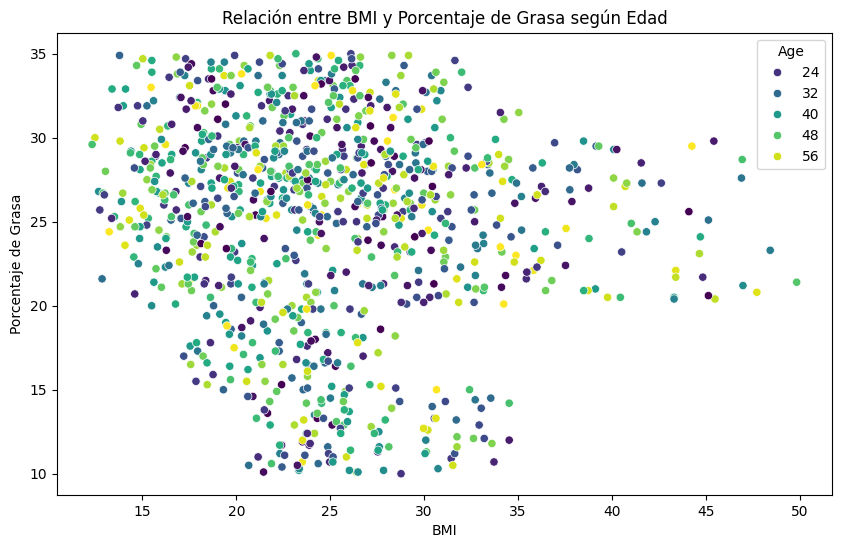

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Fat_Percentage', hue='Age', data=df, palette='viridis')
plt.title("Relación entre BMI y Porcentaje de Grasa según Edad")
plt.xlabel("BMI")
plt.ylabel("Porcentaje de Grasa")
plt.colorbar(label='Edad')
plt.show()


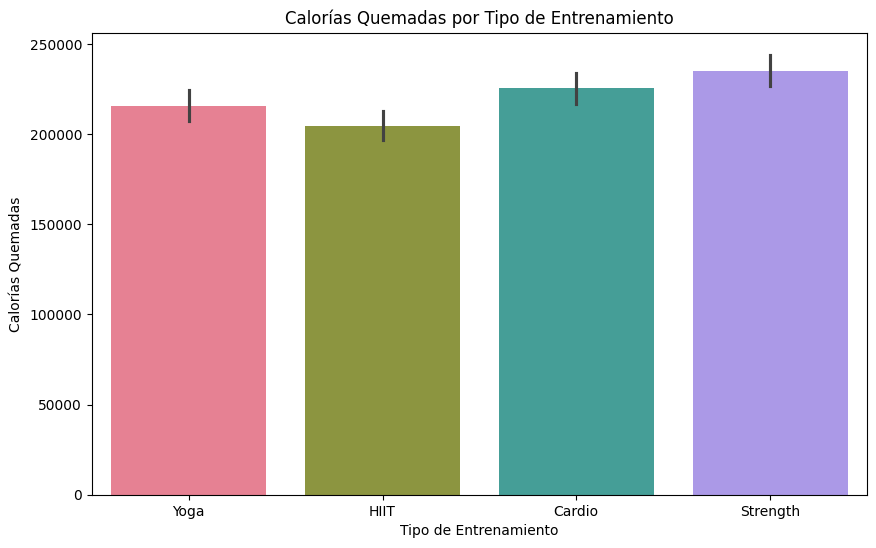

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, estimator=sum, palette='husl')
plt.title("Calorías Quemadas por Tipo de Entrenamiento")
plt.xlabel("Tipo de Entrenamiento")
plt.ylabel("Calorías Quemadas")
plt.show()


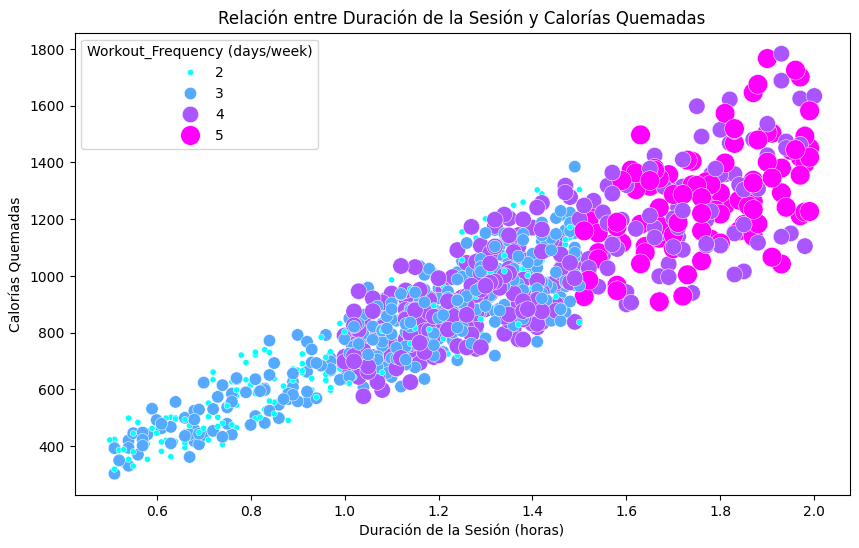

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Frequency (days/week)', size='Workout_Frequency (days/week)', sizes=(20, 200), data=df, palette='cool')
plt.title("Relación entre Duración de la Sesión y Calorías Quemadas")
plt.xlabel("Duración de la Sesión (horas)")
plt.ylabel("Calorías Quemadas")
plt.show()


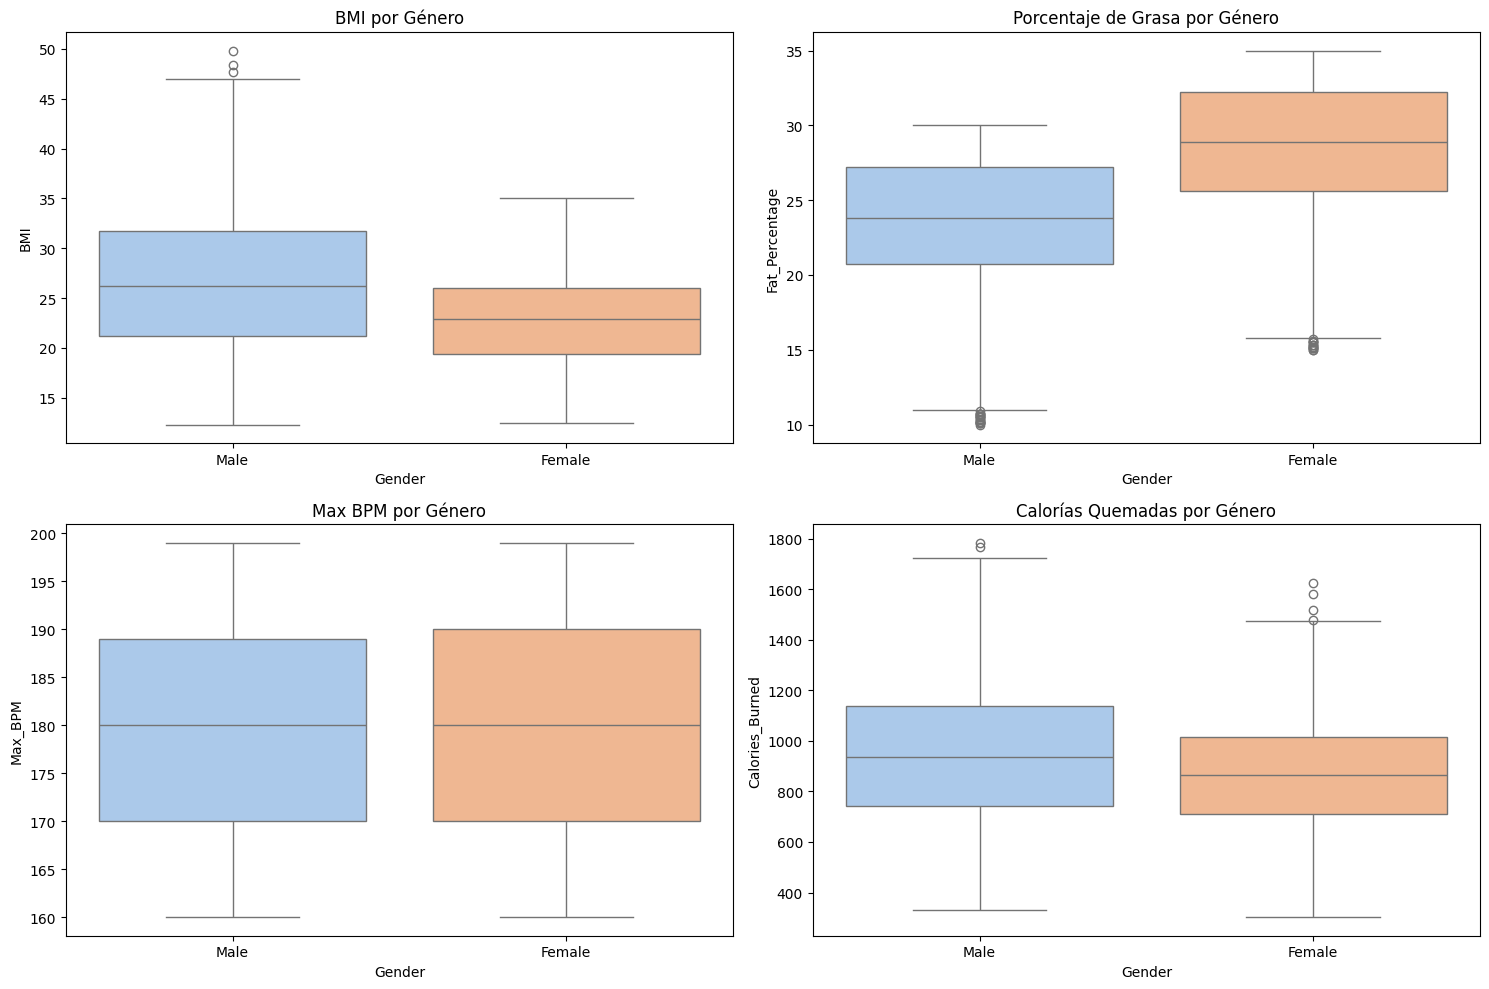

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Gender', y='BMI', data=df, palette='pastel')
plt.title("BMI por Género")

plt.subplot(2, 2, 2)
sns.boxplot(x='Gender', y='Fat_Percentage', data=df, palette='pastel')
plt.title("Porcentaje de Grasa por Género")

plt.subplot(2, 2, 3)
sns.boxplot(x='Gender', y='Max_BPM', data=df, palette='pastel')
plt.title("Max BPM por Género")

plt.subplot(2, 2, 4)
sns.boxplot(x='Gender', y='Calories_Burned', data=df, palette='pastel')
plt.title("Calorías Quemadas por Género")

plt.tight_layout()
plt.show()


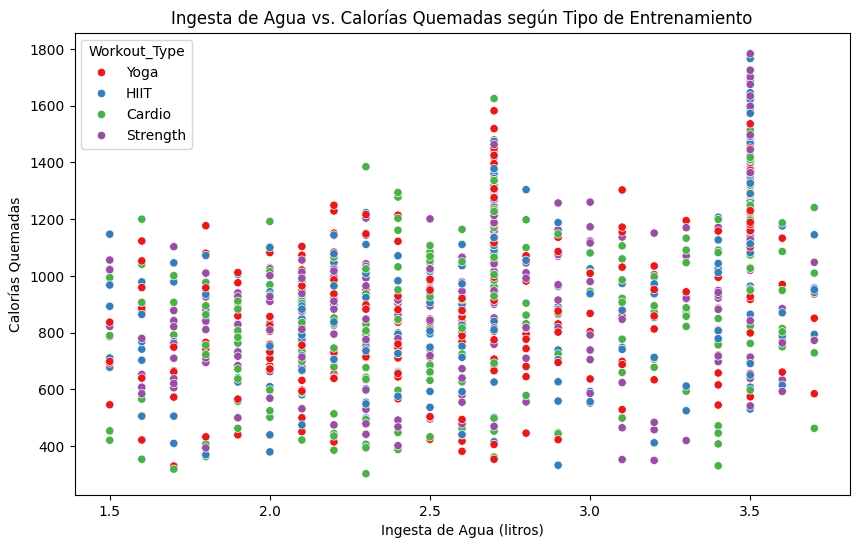

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Water_Intake (liters)', y='Calories_Burned', hue='Workout_Type', data=df, palette='Set1')
plt.title("Ingesta de Agua vs. Calorías Quemadas según Tipo de Entrenamiento")
plt.xlabel("Ingesta de Agua (litros)")
plt.ylabel("Calorías Quemadas")
plt.show()


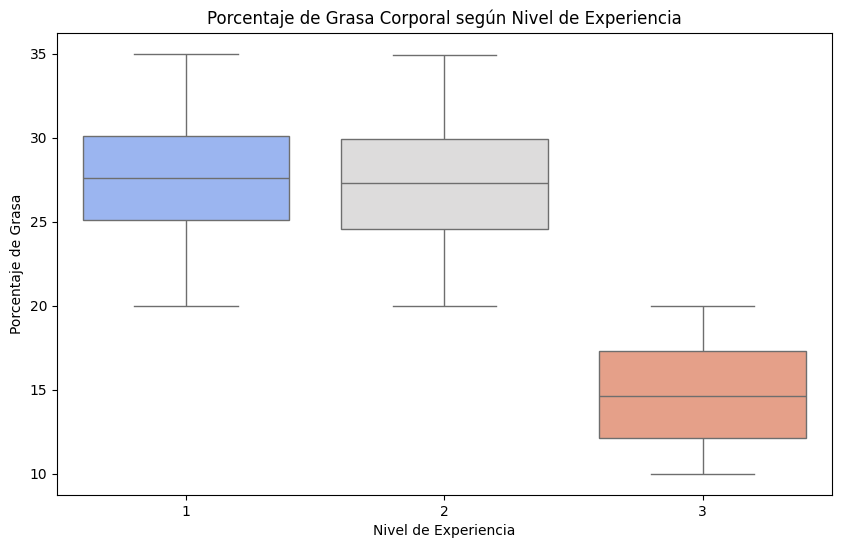

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience_Level', y='Fat_Percentage', data=df, palette='coolwarm')
plt.title("Porcentaje de Grasa Corporal según Nivel de Experiencia")
plt.xlabel("Nivel de Experiencia")
plt.ylabel("Porcentaje de Grasa")
plt.show()


# 5. Visualizations

# 6. Advanced Insights and Analysis

**6.1 Maximum Content Duration**

**6.2 Content Rating Analysis**

**6.3 Country with Most TV Shows**

# Conclusion